<a href="https://www.kaggle.com/code/ayushgpt8/student-data-analysis?scriptVersionId=155681137" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Understanding Student Data - Analysing and visualizing data from a CSV file

In this module, we will be working on a project that involves analyzing and visualizing data from a CSV file. The specific data set we will be using is the "Student Performance Data Set" from https://archive.ics.uci.edu/ml/datasets/Student+Performance.


## Loading data

In [1]:
import io
import zipfile
from urllib.request import urlopen

import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/static/public/320/student+performance.zip"

fin = urlopen(url)
with zipfile.ZipFile(io.BytesIO(fin.read())) as zip:
    print(zip.namelist())

['.student.zip_old', 'student.zip']


The below command ensures that the directory is clean before we download the dataset.

In [3]:
%%bash
rm -rf /kaggle/working/data/student_grades

In [4]:
%%bash
mkdir /kaggle/working/data/
mkdir /kaggle/working/data/student_grades
curl --output /kaggle/working/data/student_grades/student_main.zip https://archive.ics.uci.edu/static/public/320/student+performance.zip
unzip /kaggle/working/data/student_grades/student_main.zip -d /kaggle/working/data/student_grades

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40735    0 40735    0     0   230k      0 --:--:-- --:--:-- --:--:--  231k


Archive:  /kaggle/working/data/student_grades/student_main.zip
 extracting: /kaggle/working/data/student_grades/.student.zip_old  
 extracting: /kaggle/working/data/student_grades/student.zip  


In [5]:
path = "/kaggle/working/data/student_grades/student.zip"
with zipfile.ZipFile(path) as zip:
    print(zip.namelist())

['student-mat.csv', 'student-por.csv', 'student-merge.R', 'student.txt']


In [6]:
with zipfile.ZipFile(path) as zip:
    df = pd.read_csv(zip.open("student-mat.csv"), sep=";")

In [7]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [8]:
print(pd.__version__)

2.0.3


Since we are using pandas 2.x, we can make use of pyarrow. Lets first look at the memory usage for the default implementation.

In [9]:
df.memory_usage(deep=True).sum()

454598

Lets now use pandas new pyarrow engine and data type backend

In [10]:
path = "/kaggle/working/data/student_grades/student.zip"
with zipfile.ZipFile(path) as zip:
    df = pd.read_csv(zip.open("student-mat.csv"), sep=";", dtype_backend="pyarrow", engine="pyarrow")

In [11]:
df.memory_usage(deep=True).sum()

98703

We see that the pyarrow backend uses significantly less memory. Now this might be apparent here as the dataset is really tiny, but on much larger datasets, this can really affect the overall performance of the script.

## Summary Stats

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject, Math or Portuguese:

31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   school      395 non-null    string[pyarrow]
 1   sex         395 non-null    string[pyarrow]
 2   age         395 non-null    int64[pyarrow] 
 3   address     395 non-null    string[pyarrow]
 4   famsize     395 non-null    string[pyarrow]
 5   Pstatus     395 non-null    string[pyarrow]
 6   Medu        395 non-null    int64[pyarrow] 
 7   Fedu        395 non-null    int64[pyarrow] 
 8   Mjob        395 non-null    string[pyarrow]
 9   Fjob        395 non-null    string[pyarrow]
 10  reason      395 non-null    string[pyarrow]
 11  guardian    395 non-null    string[pyarrow]
 12  traveltime  395 non-null    int64[pyarrow] 
 13  studytime   395 non-null    int64[pyarrow] 
 14  failures    395 non-null    int64[pyarrow] 
 15  schoolsup   395 non-null    string[pyarrow]
 16  famsup  

The `[pyarrow]` here in the output shows us that the data is now read with pyarrow data types. Also notice the `string` and `int64` data types, that are not a part of pandas but coming from pyarrow.

In [13]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


We see with `describe()` that all the numeric columns are lying in a very small range, with neither of them having any negative values. We can further reduce the memory usage by changing the data type to a smaller container like `int8` or even `uint8`.

In [14]:
numeric_columns = (df
  .select_dtypes(include="number")
  .columns
)

In [15]:
df[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   age         395 non-null    int64[pyarrow]
 1   Medu        395 non-null    int64[pyarrow]
 2   Fedu        395 non-null    int64[pyarrow]
 3   traveltime  395 non-null    int64[pyarrow]
 4   studytime   395 non-null    int64[pyarrow]
 5   failures    395 non-null    int64[pyarrow]
 6   famrel      395 non-null    int64[pyarrow]
 7   freetime    395 non-null    int64[pyarrow]
 8   goout       395 non-null    int64[pyarrow]
 9   Dalc        395 non-null    int64[pyarrow]
 10  Walc        395 non-null    int64[pyarrow]
 11  health      395 non-null    int64[pyarrow]
 12  absences    395 non-null    int64[pyarrow]
 13  G1          395 non-null    int64[pyarrow]
 14  G2          395 non-null    int64[pyarrow]
 15  G3          395 non-null    int64[pyarrow]
dtypes: int64[pyarrow](16)
memo

Here we see that by default the numeric columns using 49.5KB of memory. Changing the datatype will bring it down to just around 7KB.

Also notice that the code is now written in multiple lines with the braces at the beginning and at the end. This enables us to create code like a recipe and is much easier to see. And as seen above, we can individually add, remove, comment out lines as we build our code. This saves us from creating many intermediate and unnecessary varaibles.

In [16]:
df[numeric_columns] = (df[numeric_columns]
  .astype("uint8[pyarrow]")
)

df[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   age         395 non-null    uint8[pyarrow]
 1   Medu        395 non-null    uint8[pyarrow]
 2   Fedu        395 non-null    uint8[pyarrow]
 3   traveltime  395 non-null    uint8[pyarrow]
 4   studytime   395 non-null    uint8[pyarrow]
 5   failures    395 non-null    uint8[pyarrow]
 6   famrel      395 non-null    uint8[pyarrow]
 7   freetime    395 non-null    uint8[pyarrow]
 8   goout       395 non-null    uint8[pyarrow]
 9   Dalc        395 non-null    uint8[pyarrow]
 10  Walc        395 non-null    uint8[pyarrow]
 11  health      395 non-null    uint8[pyarrow]
 12  absences    395 non-null    uint8[pyarrow]
 13  G1          395 non-null    uint8[pyarrow]
 14  G2          395 non-null    uint8[pyarrow]
 15  G3          395 non-null    uint8[pyarrow]
dtypes: uint8[pyarrow](16)
memo

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   school      395 non-null    string[pyarrow]
 1   sex         395 non-null    string[pyarrow]
 2   age         395 non-null    uint8[pyarrow] 
 3   address     395 non-null    string[pyarrow]
 4   famsize     395 non-null    string[pyarrow]
 5   Pstatus     395 non-null    string[pyarrow]
 6   Medu        395 non-null    uint8[pyarrow] 
 7   Fedu        395 non-null    uint8[pyarrow] 
 8   Mjob        395 non-null    string[pyarrow]
 9   Fjob        395 non-null    string[pyarrow]
 10  reason      395 non-null    string[pyarrow]
 11  guardian    395 non-null    string[pyarrow]
 12  traveltime  395 non-null    uint8[pyarrow] 
 13  studytime   395 non-null    uint8[pyarrow] 
 14  failures    395 non-null    uint8[pyarrow] 
 15  schoolsup   395 non-null    string[pyarrow]
 16  famsup  

Let's see how these numeric columns are related with each other using correlations.

In [18]:
df.corr(numeric_only=True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


While all the relevant data is there in the table shown above, it is really hard to understand. We can use pandas styler here to style it in a way to make it clearer.

In [19]:
(df
    .corr(numeric_only=True)
    .style
    .background_gradient()
)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


Now, this is already much better. We see that the grades are very closely correlated, understandably maybe because if a student does well in the first test, or second one, there is a good chance they will do good in the third one.

We also see Fathers and mother education (`Fedu` and `Medu`) being closely correlated.

Weekend alcohol consumption (`Walc`) also seems to be closely correlated with workday alcohol consumption (`Dalc`) and both showing correlation with going out with friends(`goout`).

There maybe other correlations here that might be very apparent here. Let's change the background gradient here to a more divergent one.

In [20]:
(df
    .corr(numeric_only=True)
    .style
    .background_gradient(cmap="RdBu")
)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


Now this is better but there is another issue here now. The reddest values here are shown around -0.23/-0.25, where we need those very saturated color values at the extremes i.e. -1 and 1. And also, we want our white values to be at 0 to show neutral correlation whereas here they are around 0.42

These extreme values comes from the Pearson Correlation Coefficient which is what pandas defaults to here with `corr()`. This coefficient ranges from -1 to 1 and shows linear correlation between the columns.

Let's pin the values here such a

In [21]:
(df
    .corr(numeric_only=True)
    .style
    .background_gradient(cmap="RdBu", vmin=-1, vmax=1)
)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


Now we see properly colored values here and it is much easier now to spot the negative and postive correlations between the columns.

Also, this is showing us Pearson correlation by default. Columns can also have a non linear relationship between them. For that, we can use the Spearman correlation, also known as the Rank correlation.

In [22]:
(df
    .corr(numeric_only=True, method='spearman')
    .style
    .background_gradient(cmap="RdBu", vmin=-1, vmax=1)
)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.161294,-0.149596,0.109804,0.031557,0.236464,0.031380,0.000302,0.140131,0.097073,0.132799,-0.075150,0.149276,-0.057630,-0.167622,-0.173438
Medu,-0.161294,1.000000,0.631577,-0.147849,0.063498,-0.242373,0.012361,0.028493,0.064954,0.022729,-0.044332,-0.035686,0.097562,0.209662,0.236354,0.225036
Fedu,-0.149596,0.631577,1.000000,-0.154454,0.018429,-0.236616,0.011400,-0.017132,0.047961,0.003994,-0.014486,0.018113,0.003568,0.194737,0.194844,0.170049
traveltime,0.109804,-0.147849,-0.154454,1.000000,-0.105969,0.079917,-0.038656,-0.022279,-0.001430,0.066477,0.063654,-0.015452,-0.025061,-0.085501,-0.123795,-0.120530
studytime,0.031557,0.063498,0.018429,-0.105969,1.000000,-0.157633,0.058141,-0.131321,-0.065979,-0.217904,-0.264021,-0.091497,-0.046180,0.162286,0.129160,0.105170
failures,0.236464,-0.242373,-0.236616,0.079917,-0.157633,1.000000,-0.051389,0.088058,0.105419,0.187492,0.127912,0.079688,0.096028,-0.346052,-0.362357,-0.361224
famrel,0.031380,0.012361,0.011400,-0.038656,0.058141,-0.051389,1.000000,0.143142,0.063549,-0.106338,-0.116060,0.085341,-0.086577,0.026433,0.008165,0.054977
freetime,0.000302,0.028493,-0.017132,-0.022279,-0.131321,0.088058,0.143142,1.000000,0.285182,0.194223,0.130246,0.088975,0.013397,0.006973,-0.016765,-0.004994
goout,0.140131,0.064954,0.047961,-0.001430,-0.065979,0.105419,0.063549,0.285182,1.000000,0.255146,0.393333,-0.018541,0.133280,-0.151636,-0.160985,-0.166119
Dalc,0.097073,0.022729,0.003994,0.066477,-0.217904,0.187492,-0.106338,0.194223,0.255146,1.000000,0.639906,0.095139,0.129651,-0.111438,-0.110086,-0.120944


We'll now look at the non-numeric columns. Usually we use `df.select_dtypes("object")`. This was because pandas during v1.x didn't have a native way to represent strings so it would fall back to python strings. Since we are using pyarrow dtypes with pandas 2.x, we'll use the following:

In [23]:
df.select_dtypes("string[pyarrow]")

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


If you notice here, majority of the columns, if not all of them, have distinct and repeating values like `GP`, `MS` in `school` column, `famzie` having `LE3`, `GT3` and so on. These can be easily turned into categorical columns to reduce memory usage even further and making further processing much easier.

Lets first look at some of them below.

In [24]:
df.reason.value_counts()

reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64[pyarrow]

In [25]:
df.Pstatus.value_counts()

Pstatus
T    354
A     41
Name: count, dtype: int64[pyarrow]

In [26]:
df.address.value_counts()

address
U    307
R     88
Name: count, dtype: int64[pyarrow]

In [27]:
df.sex.value_counts()

sex
F    208
M    187
Name: count, dtype: int64[pyarrow]

In [28]:
df.school.value_counts()

school
GP    349
MS     46
Name: count, dtype: int64[pyarrow]

In [29]:
df.guardian.value_counts()

guardian
mother    273
father     90
other      32
Name: count, dtype: int64[pyarrow]

In [30]:
df.famsize.value_counts()

famsize
GT3    281
LE3    114
Name: count, dtype: int64[pyarrow]

In [31]:
df.Mjob.value_counts()

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64[pyarrow]

In [32]:
df.paid.value_counts()

paid
no     214
yes    181
Name: count, dtype: int64[pyarrow]

In [33]:
df.Fjob.value_counts()

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64[pyarrow]

The columns with `yes` and `no` values in them like `paid`, `schoolsup`, `famsup`, `activities`, `nursery`, `higher`, `internet`, `romantic` can be encoded as boolean instead of categorical. Boolean data types are usually `True` or `False`, here we can encode `yes` and `no` to `True` and `False` respectively.

In [34]:
bool_columns = ['paid', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for column in bool_columns:
    df[column] = df[column].map({'yes': True, 'no': False})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   school      395 non-null    string[pyarrow]
 1   sex         395 non-null    string[pyarrow]
 2   age         395 non-null    uint8[pyarrow] 
 3   address     395 non-null    string[pyarrow]
 4   famsize     395 non-null    string[pyarrow]
 5   Pstatus     395 non-null    string[pyarrow]
 6   Medu        395 non-null    uint8[pyarrow] 
 7   Fedu        395 non-null    uint8[pyarrow] 
 8   Mjob        395 non-null    string[pyarrow]
 9   Fjob        395 non-null    string[pyarrow]
 10  reason      395 non-null    string[pyarrow]
 11  guardian    395 non-null    string[pyarrow]
 12  traveltime  395 non-null    uint8[pyarrow] 
 13  studytime   395 non-null    uint8[pyarrow] 
 14  failures    395 non-null    uint8[pyarrow] 
 15  schoolsup   395 non-null    bool           
 16  famsup  

Lets also change the remaining string data type columns

In [35]:
category_columns = (df
                    .select_dtypes(exclude=['bool', 'number'])
                    .columns
                   )

category_columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian'],
      dtype='object')

In [36]:
df[category_columns] = (df[category_columns]
                             .astype('category')
                        )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   school      395 non-null    category      
 1   sex         395 non-null    category      
 2   age         395 non-null    uint8[pyarrow]
 3   address     395 non-null    category      
 4   famsize     395 non-null    category      
 5   Pstatus     395 non-null    category      
 6   Medu        395 non-null    uint8[pyarrow]
 7   Fedu        395 non-null    uint8[pyarrow]
 8   Mjob        395 non-null    category      
 9   Fjob        395 non-null    category      
 10  reason      395 non-null    category      
 11  guardian    395 non-null    category      
 12  traveltime  395 non-null    uint8[pyarrow]
 13  studytime   395 non-null    uint8[pyarrow]
 14  failures    395 non-null    uint8[pyarrow]
 15  schoolsup   395 non-null    bool          
 16  famsup      395 non-null  

We can also cross tabulate two columns with pandas.

In this first example, we cross tabulate Fathers (`Fedu`) and mothers (`Medu`) education. This allows us to see till what level each parent have studied compared to the other one.

In [37]:
pd.crosstab(df.Fedu, df.Medu)

Medu,0,1,2,3,4
Fedu,,,,,
0,0,1,0,0,1
1,1,37,28,15,1
2,2,15,51,28,19
3,0,5,17,38,40
4,0,1,7,18,70


In the second example, we see which of the genders want to go for higher education.

In [38]:
pd.crosstab(df.sex, df.higher)

higher,False,True
sex,,
F,4,204
M,16,171


We can also normalise this to show percentages instead of actual values. Depending on the problem at hand, that might come in handy. We also have the ability to normalize across the index and columns as well.

In [39]:
(pd.crosstab(df.sex, df.higher, normalize=True)
    .style
    .format("{:.2%}")
)

higher,False,True
sex,,
F,1.01%,51.65%
M,4.05%,43.29%


In [40]:
(pd.crosstab(df.school, df.higher, normalize="index")
    .style
    .format("{:.2%}")
)

higher,False,True
school,,
GP,4.87%,95.13%
MS,6.52%,93.48%


## Visualizations

Each column can be visualized in a number of ways and using different types of plots. Depending on the data, and the problem at hand, the type of plot choosen can change. Lets look at some columns using some basic plotting strategies.

<Axes: >

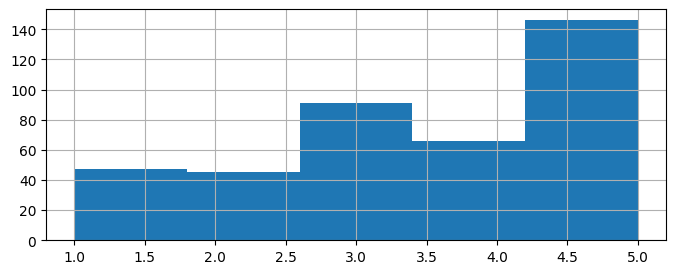

In [41]:
df.health.hist(figsize=(8,3), bins=5) # default bin value is 10, since health goes only upto 5, we set bins to 5

<Axes: >

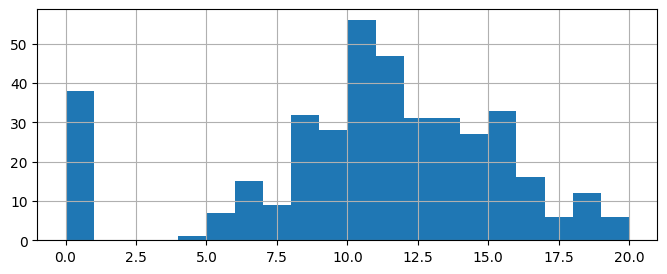

In [42]:
df.G3.hist(figsize=(8,3), bins=20)

This is not an exact bell curve here but we see alot of students that failed and many that averaged around ~10-11. We see a similar trend for G2 below as well. But for G1, we see that nobody failed but there were sutdents that scored quite low and nobody scoring between ~6.5-7, ~10.5-11, and ~14.5-15.

<Axes: >

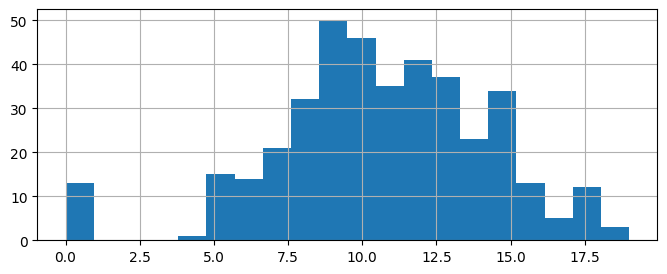

In [43]:
df.G2.hist(figsize=(8,3), bins=20)

<Axes: >

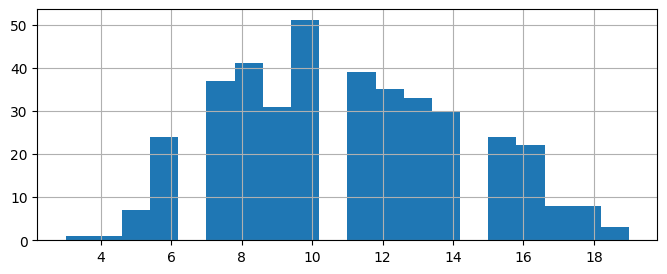

In [44]:
df.G1.hist(figsize=(8,3), bins=20)

<Axes: xlabel='Medu', ylabel='G3'>

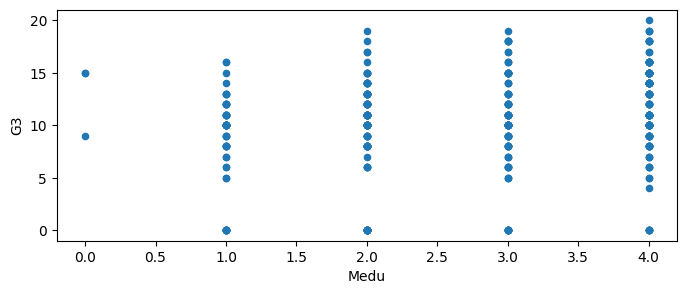

In [45]:
df.plot.scatter(x="Medu", y="G3", figsize=(8, 3))

<Axes: xlabel='Medu', ylabel='G3'>

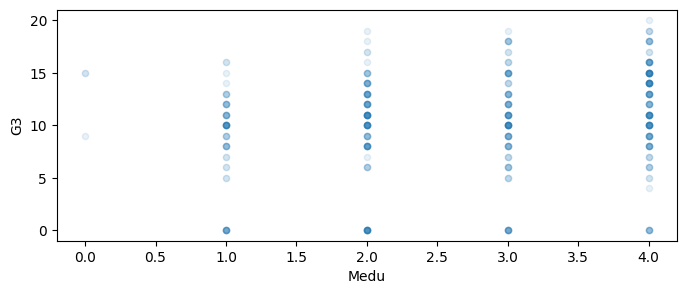

In [46]:
df.plot.scatter(x="Medu", y="G3", alpha=0.1, figsize=(8, 3))

<Axes: xlabel='edu_jit', ylabel='G3'>

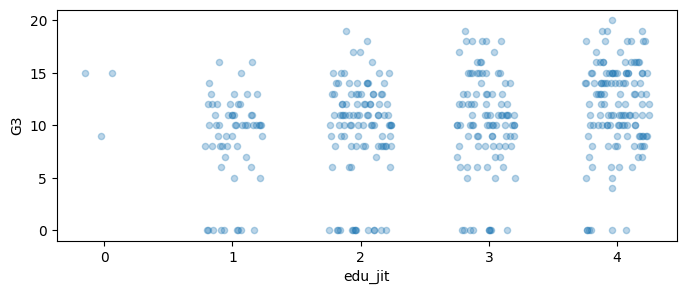

In [47]:
import numpy as np

amt = 0.5
(
    df.assign(edu_jit=df.Medu + np.random.random(len(df)) * amt - amt / 2).plot.scatter(
        x="edu_jit", y="G3", alpha=0.3, figsize=(8, 3)
    )
)

<Axes: xlabel='edu_jit', ylabel='G3'>

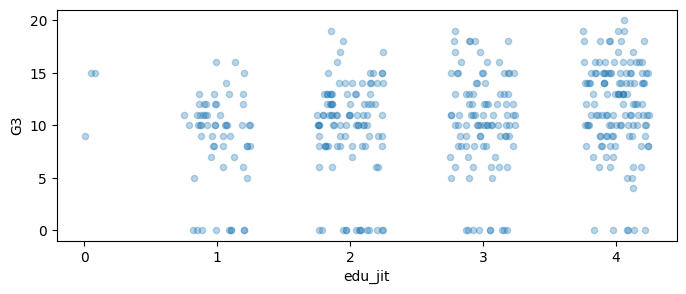

In [48]:
import numpy as np


def jitter(df, col, amt=0.5):
    return df[col] + np.random.random(len(df)) * amt - amt / 2


(
    df.assign(edu_jit=lambda df_: jitter(df_, col="Medu")).plot.scatter(
        x="edu_jit", y="G3", alpha=0.3, figsize=(8, 3)
    )
)

<Axes: xlabel='guardian'>

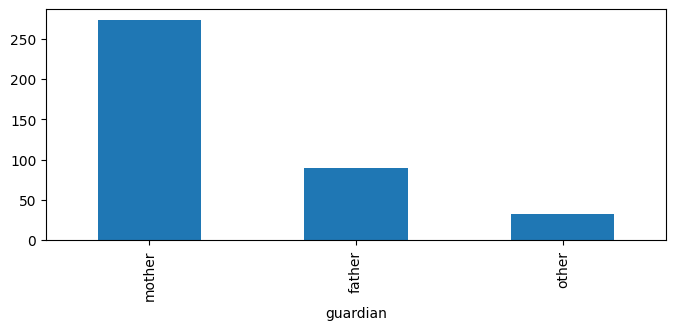

In [49]:
df.guardian.value_counts().plot.bar(figsize=(8, 3))

<Axes: ylabel='guardian'>

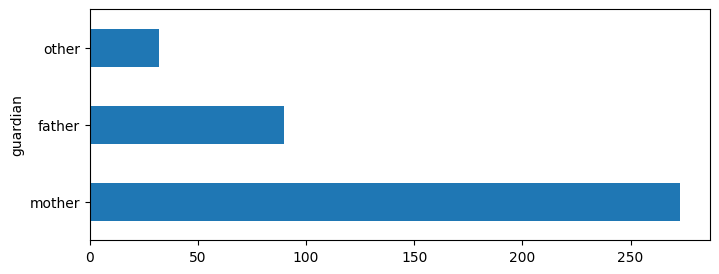

In [50]:
df.guardian.value_counts().plot.barh(figsize=(8, 3))